Treinar modelo era

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('oceanographic and meteorological dataset.csv')
df.head(5)
df

,time,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5,uo_cop,vo_cop,swh_cop,mwp_cop,mwd_cop,peak_period_cop
0,2025-01-01 00:00:00,-6.306534,14.981308,172.33765,8.959626,4.751488,10.330421,0.019531,0.160156,5.10,7.56,175.07,10.85
1,2025-01-01 01:00:00,-4.723419,14.342773,171.36377,8.907424,4.758851,10.286964,0.026367,0.164062,NaN,NaN,NaN,NaN
2,2025-01-01 02:00:00,-3.978439,12.770416,171.11426,8.913869,4.665862,10.272316,0.038086,0.162109,NaN,NaN,NaN,NaN
3,2025-01-01 03:00:00,-3.164124,15.130005,171.06311,8.911307,4.565788,10.260597,0.053711,0.155273,5.03,7.60,174.16,10.71
4,2025-01-01 04:00:00,-3.343689,12.074799,171.16702,8.862277,4.541395,10.223000,0.070312,0.143555,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988,2025-11-29 20:00:00,1.050568,-3.002213,321.76660,9.391575,1.740068,11.188332,-0.073242,-0.041992,NaN,NaN,NaN,NaN
7989,2025-11-29 21:00:00,0.547165,-2.844864,321.52417,9.404360,1.737550,11.162453,-0.093750,-0.019531,NaN,NaN,NaN,NaN
7990,2025-11-29 22:00:00,0.728592,-1.884628,321.26782,9.426389,1.733764,11.128273,-0.110352,0.005859,NaN,NaN,NaN,NaN
7991,2025-11-29 23:00:00,1.034180,-1.534332,321.06323,9.438893,1.730834,11.099464,-0.120117,0.032227,NaN,NaN,NaN,NaN


Treinar modelo para variavel mwd

In [3]:
colunas_para_remover = [
    'uo_cop', 'vo_cop', 'swh_cop', 'mwd_cop', 
    'mwp_cop', 'peak_period_cop', 'time',

]


df = df.drop(columns=colunas_para_remover, errors='ignore')


df.describe()

,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5
count,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000
mean,2.188604,-0.618673,254.533087,8.491293,2.289455,10.429202
std,5.049941,5.654880,101.285307,1.508553,1.293055,2.219554
min,-10.217163,-17.162354,0.005922,5.044391,0.706308,4.360695
25%,-1.410156,-4.420624,247.110920,7.368544,1.306941,8.810890
50%,2.046631,-1.186233,291.861820,8.303400,1.870715,10.276711
75%,5.630310,3.352921,320.586180,9.305229,2.910931,11.903175
max,21.640991,17.548920,359.915250,14.556703,8.823090,19.234710


Alterar variavel mwd para sin e cos

In [4]:
def add_direction_features(df, col):
    df[f'{col}_sin'] = np.sin(np.deg2rad(df[col]))
    df[f'{col}_cos'] = np.cos(np.deg2rad(df[col]))
    return df

In [5]:
df = add_direction_features(df, 'mwd_era5')


In [6]:
df.describe()

,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5,mwd_era5_sin,mwd_era5_cos
count,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000
mean,2.188604,-0.618673,254.533087,8.491293,2.289455,10.429202,-0.482059,0.436709
std,5.049941,5.654880,101.285307,1.508553,1.293055,2.219554,0.585773,0.483577
min,-10.217163,-17.162354,0.005922,5.044391,0.706308,4.360695,-1.000000,-0.999988
25%,-1.410156,-4.420624,247.110920,7.368544,1.306941,8.810890,-0.926656,0.149474
50%,2.046631,-1.186233,291.861820,8.303400,1.870715,10.276711,-0.712566,0.533409
75%,5.630310,3.352921,320.586180,9.305229,2.910931,11.903175,-0.268729,0.849137
max,21.640991,17.548920,359.915250,14.556703,8.823090,19.234710,1.000000,1.000000


Criar Modelo

In [17]:
def create_supervised_dataset(df, features, target, lookback, horizon):
    X, y = [], []

    data = df[features + [target]].values

    for i in range(lookback, len(df) - horizon):
        X.append(data[i - lookback:i, :-1])
        y.append(data[i + horizon, -1])

    return np.array(X), np.array(y)

In [13]:
 def temporal_train_val_test_split(X, y, train=0.7, val=0.1):
    n = len(X)
    n_train = int(n * train)
    n_val = int(n * (train + val))

    X_train = X[:n_train]
    y_train = y[:n_train]

    X_val = X[n_train:n_val]
    y_val = y[n_train:n_val]

    X_test = X[n_val:]
    y_test = y[n_val:]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [14]:
def scale_data(X_train, X_test):
    n_samples, timesteps, n_features = X_train.shape

    scaler = StandardScaler()
    X_train_2d = X_train.reshape(-1, n_features)
    X_test_2d  = X_test.reshape(-1, n_features)

    X_train_scaled = scaler.fit_transform(X_train_2d)
    X_test_scaled  = scaler.transform(X_test_2d)

    X_train_scaled = X_train_scaled.reshape(n_samples, timesteps, n_features)
    X_test_scaled  = X_test_scaled.reshape(X_test.shape[0], timesteps, n_features)

    return X_train_scaled, X_test_scaled, scaler

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input

def build_cnn_model(input_shape):
    model = Sequential([
        # Forma moderna de definir a entrada
        Input(shape=input_shape), 
        
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),

        
        Flatten(),
        Dense(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [19]:
HORIZONS = [1, 3, 6, 12, 24]
LOOKBACK = 24

TARGETS = ['swh_era5', 'mwp_era5', 'pp1d_era5']
FEATURES_ERA5 = [
    'u10_era5',
    'v10_era5',
    'swh_era5',
    'mwd_era5_sin',
    'mwd_era5_cos',
    'mwp_era5',
    'pp1d_era5'
]

  
results = []

for target in TARGETS:
    for h in HORIZONS:

        print(f'\nTreinar target={target} | horizonte={h}h')

        # criar dataset
        X, y = create_supervised_dataset(
            df,
            FEATURES_ERA5,
            target,
            LOOKBACK,
            h
        )

        X_train, X_test, y_train, y_test = temporal_train_test_split(X, y)
        X_train, X_test, scaler = scale_data(X_train, X_test)

        model = build_cnn_model(X_train.shape[1:])

        history = model.fit(
            X_train, y_train,
            validation_split=0.2,
            epochs=20,
            batch_size=32,
            verbose=2
        )

        y_pred = model.predict(X_test).ravel()

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae  = mean_absolute_error(y_test, y_pred)
        r2   = r2_score(y_test, y_pred)

        print(f'RMSE = {rmse:.3f} | MAE = {mae:.3f} | R2 = {r2:.3f}')

        results.append({
            'target': target,
            'horizon': h,
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        })  


Treinar target=swh_era5 | horizonte=1h
Epoch 1/20
140/140 - 4s - 31ms/step - loss: 0.8815 - mae: 0.6162 - val_loss: 0.0954 - val_mae: 0.2600
Epoch 2/20
140/140 - 1s - 8ms/step - loss: 0.2625 - mae: 0.3621 - val_loss: 0.0402 - val_mae: 0.1445
Epoch 3/20
140/140 - 1s - 7ms/step - loss: 0.2062 - mae: 0.3229 - val_loss: 0.0787 - val_mae: 0.2400
Epoch 4/20
140/140 - 1s - 7ms/step - loss: 0.1999 - mae: 0.3183 - val_loss: 0.0895 - val_mae: 0.2573
Epoch 5/20
140/140 - 1s - 7ms/step - loss: 0.1639 - mae: 0.2848 - val_loss: 0.0466 - val_mae: 0.1641
Epoch 6/20
140/140 - 1s - 6ms/step - loss: 0.1655 - mae: 0.2863 - val_loss: 0.0383 - val_mae: 0.1626
Epoch 7/20
140/140 - 1s - 7ms/step - loss: 0.1590 - mae: 0.2781 - val_loss: 0.0335 - val_mae: 0.1422
Epoch 8/20
140/140 - 1s - 5ms/step - loss: 0.1412 - mae: 0.2671 - val_loss: 0.0389 - val_mae: 0.1547
Epoch 9/20
140/140 - 1s - 5ms/step - loss: 0.1551 - mae: 0.2773 - val_loss: 0.0376 - val_mae: 0.1563
Epoch 10/20
140/140 - 1s - 7ms/step - loss: 0.1350

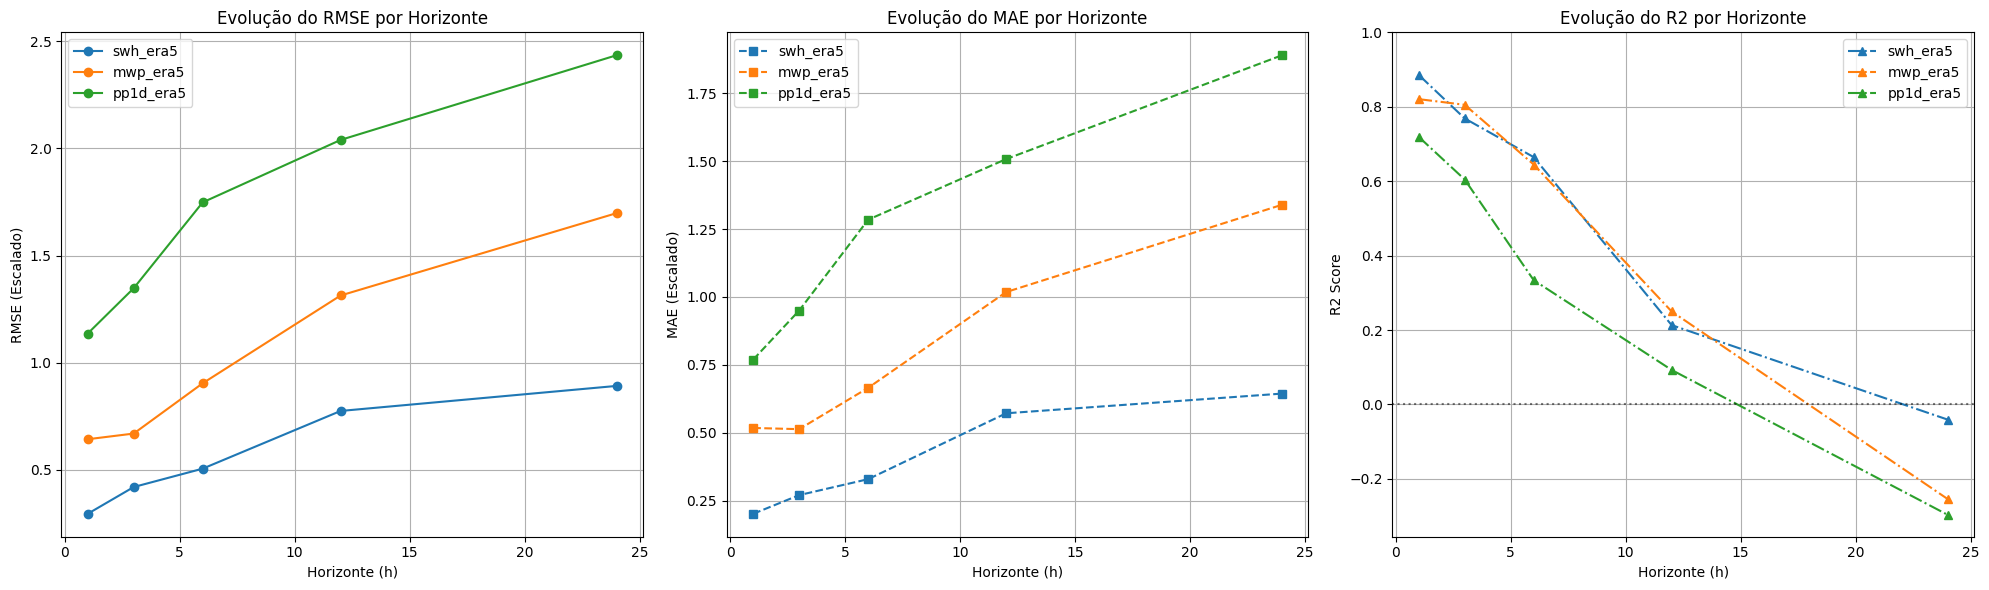

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.DataFrame(results)

# 1. Alterado para 1 linha e 3 colunas para incluir o R2
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

for target in TARGETS:
    subset = results_df[results_df['target'] == target]
    
    # Gráfico 1: RMSE
    ax1.plot(subset['horizon'], subset['rmse'], marker='o', label=target)
    
    # Gráfico 2: MAE
    ax2.plot(subset['horizon'], subset['mae'], marker='s', linestyle='--', label=target)
    
    # Gráfico 3: R2 (Novo)
    ax3.plot(subset['horizon'], subset['r2'], marker='^', linestyle='-.', label=target)

# Ajustes do gráfico de RMSE
ax1.set_title('Evolução do RMSE por Horizonte')
ax1.set_xlabel('Horizonte (h)')
ax1.set_ylabel('RMSE (Escalado)')
ax1.legend()
ax1.grid(True)

# Ajustes do gráfico de MAE
ax2.set_title('Evolução do MAE por Horizonte')
ax2.set_xlabel('Horizonte (h)')
ax2.set_ylabel('MAE (Escalado)')
ax2.legend()
ax2.grid(True)

# Ajustes do gráfico de R2
ax3.set_title('Evolução do R2 por Horizonte')
ax3.set_xlabel('Horizonte (h)')
ax3.set_ylabel('R2 Score')
# Adiciona uma linha horizontal no 0 para identificar onde o modelo falha
ax3.axhline(0, color='black', linestyle=':', alpha=0.5) 
ax3.set_ylim(None, 1.0) # O R2 não passa de 1.0
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

In [21]:
print("\n--- RESUMO DOS RESULTADOS (RMSE) ---")
pivot_rmse = results_df.pivot(index='horizon', columns='target', values='rmse')
display(pivot_rmse.round(4))

print("\n--- RESUMO DOS RESULTADOS (MAE) ---")
pivot_mae = results_df.pivot(index='horizon', columns='target', values='mae')
display(pivot_mae.round(4))




--- RESUMO DOS RESULTADOS (RMSE) ---


target,mwp_era5,pp1d_era5,swh_era5
horizon,,,
1,0.6432,1.1362,0.2954
3,0.6697,1.3476,0.4202
6,0.9042,1.7480,0.5059
12,1.3137,2.0394,0.7751
24,1.6977,2.4343,0.8918



--- RESUMO DOS RESULTADOS (MAE) ---


target,mwp_era5,pp1d_era5,swh_era5
horizon,,,
1,0.5176,0.7695,0.2014
3,0.5131,0.9502,0.2703
6,0.6654,1.2847,0.3290
12,1.0181,1.5080,0.5716
24,1.3397,1.8904,0.6442


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten

def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='linear'))  # <- DUAS UNIDADES de saída!
    model.compile(optimizer='adam', loss='mse')
    return model



===== Horizonte 1h =====

Epoch 1/20
140/140 - 2s - 13ms/step - loss: 0.0502 - val_loss: 0.0303
Epoch 2/20
140/140 - 1s - 4ms/step - loss: 0.0113 - val_loss: 0.0288
Epoch 3/20
140/140 - 1s - 5ms/step - loss: 0.0074 - val_loss: 0.0232
Epoch 4/20
140/140 - 1s - 5ms/step - loss: 0.0060 - val_loss: 0.0233
Epoch 5/20
140/140 - 1s - 4ms/step - loss: 0.0045 - val_loss: 0.0199
Epoch 6/20
140/140 - 1s - 4ms/step - loss: 0.0040 - val_loss: 0.0203
Epoch 7/20
140/140 - 1s - 6ms/step - loss: 0.0035 - val_loss: 0.0174
Epoch 8/20
140/140 - 1s - 6ms/step - loss: 0.0030 - val_loss: 0.0195
Epoch 9/20
140/140 - 1s - 6ms/step - loss: 0.0030 - val_loss: 0.0184
Epoch 10/20
140/140 - 1s - 6ms/step - loss: 0.0024 - val_loss: 0.0166
Epoch 11/20
140/140 - 1s - 5ms/step - loss: 0.0024 - val_loss: 0.0186
Epoch 12/20
140/140 - 1s - 6ms/step - loss: 0.0026 - val_loss: 0.0163
Epoch 13/20
140/140 - 1s - 5ms/step - loss: 0.0020 - val_loss: 0.0165
Epoch 14/20
140/140 - 1s - 5ms/step - loss: 0.0019 - val_loss: 0.0197
E

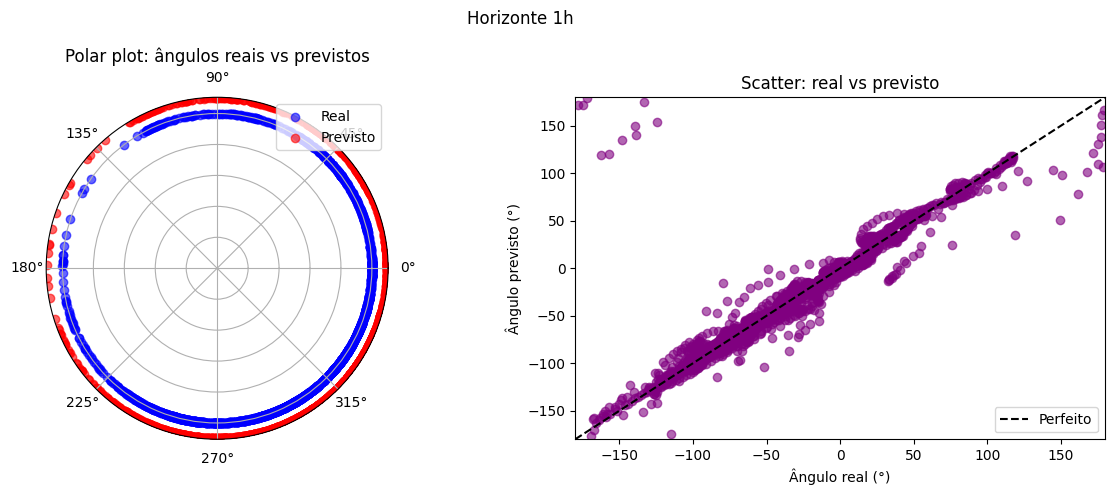


===== Horizonte 3h =====

Epoch 1/20
140/140 - 2s - 14ms/step - loss: 0.0522 - val_loss: 0.0468
Epoch 2/20
140/140 - 1s - 5ms/step - loss: 0.0136 - val_loss: 0.0420
Epoch 3/20
140/140 - 1s - 5ms/step - loss: 0.0106 - val_loss: 0.0365
Epoch 4/20
140/140 - 1s - 6ms/step - loss: 0.0081 - val_loss: 0.0383
Epoch 5/20
140/140 - 1s - 5ms/step - loss: 0.0067 - val_loss: 0.0378
Epoch 6/20
140/140 - 1s - 5ms/step - loss: 0.0061 - val_loss: 0.0394
Epoch 7/20
140/140 - 1s - 5ms/step - loss: 0.0056 - val_loss: 0.0452
Epoch 8/20
140/140 - 1s - 5ms/step - loss: 0.0050 - val_loss: 0.0409
Epoch 9/20
140/140 - 1s - 5ms/step - loss: 0.0046 - val_loss: 0.0436
Epoch 10/20
140/140 - 1s - 6ms/step - loss: 0.0042 - val_loss: 0.0400
Epoch 11/20
140/140 - 1s - 5ms/step - loss: 0.0037 - val_loss: 0.0414
Epoch 12/20
140/140 - 1s - 5ms/step - loss: 0.0037 - val_loss: 0.0352
Epoch 13/20
140/140 - 1s - 6ms/step - loss: 0.0034 - val_loss: 0.0434
Epoch 14/20
140/140 - 1s - 6ms/step - loss: 0.0033 - val_loss: 0.0407
E

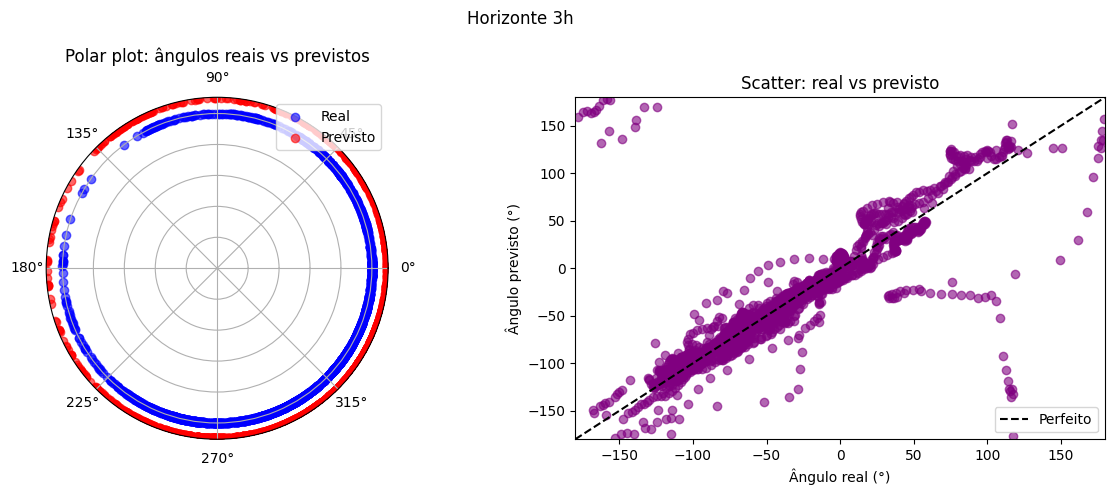


===== Horizonte 6h =====

Epoch 1/20
140/140 - 2s - 12ms/step - loss: 0.0541 - val_loss: 0.0757
Epoch 2/20
140/140 - 0s - 3ms/step - loss: 0.0216 - val_loss: 0.0603
Epoch 3/20
140/140 - 1s - 4ms/step - loss: 0.0166 - val_loss: 0.0659
Epoch 4/20
140/140 - 1s - 4ms/step - loss: 0.0140 - val_loss: 0.0531
Epoch 5/20
140/140 - 1s - 5ms/step - loss: 0.0110 - val_loss: 0.0571
Epoch 6/20
140/140 - 1s - 5ms/step - loss: 0.0101 - val_loss: 0.0541
Epoch 7/20
140/140 - 1s - 6ms/step - loss: 0.0084 - val_loss: 0.0559
Epoch 8/20
140/140 - 1s - 5ms/step - loss: 0.0078 - val_loss: 0.0642
Epoch 9/20
140/140 - 1s - 5ms/step - loss: 0.0080 - val_loss: 0.0582
Epoch 10/20
140/140 - 1s - 5ms/step - loss: 0.0067 - val_loss: 0.0662
Epoch 11/20
140/140 - 1s - 5ms/step - loss: 0.0059 - val_loss: 0.0641
Epoch 12/20
140/140 - 1s - 4ms/step - loss: 0.0064 - val_loss: 0.0571
Epoch 13/20
140/140 - 1s - 5ms/step - loss: 0.0048 - val_loss: 0.0641
Epoch 14/20
140/140 - 1s - 4ms/step - loss: 0.0047 - val_loss: 0.0612
E

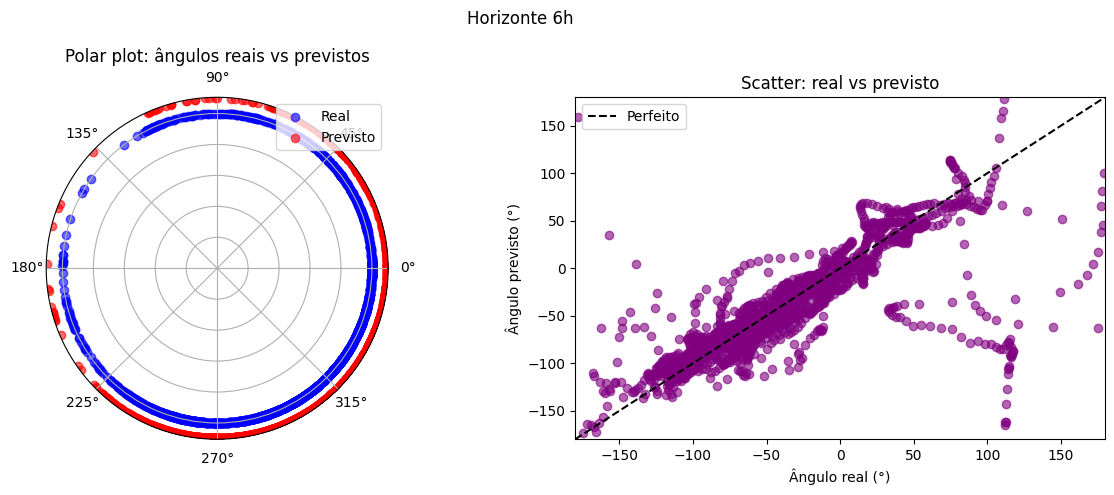


===== Horizonte 12h =====

Epoch 1/20
140/140 - 2s - 12ms/step - loss: 0.0842 - val_loss: 0.1050
Epoch 2/20
140/140 - 1s - 5ms/step - loss: 0.0346 - val_loss: 0.1160
Epoch 3/20
140/140 - 1s - 5ms/step - loss: 0.0262 - val_loss: 0.1067
Epoch 4/20
140/140 - 1s - 5ms/step - loss: 0.0197 - val_loss: 0.1115
Epoch 5/20
140/140 - 1s - 5ms/step - loss: 0.0172 - val_loss: 0.1202
Epoch 6/20
140/140 - 1s - 5ms/step - loss: 0.0140 - val_loss: 0.1180
Epoch 7/20
140/140 - 1s - 5ms/step - loss: 0.0112 - val_loss: 0.1249
Epoch 8/20
140/140 - 1s - 5ms/step - loss: 0.0096 - val_loss: 0.1475
Epoch 9/20
140/140 - 1s - 5ms/step - loss: 0.0086 - val_loss: 0.1417
Epoch 10/20
140/140 - 1s - 4ms/step - loss: 0.0082 - val_loss: 0.1474
Epoch 11/20
140/140 - 1s - 4ms/step - loss: 0.0071 - val_loss: 0.1456
Epoch 12/20
140/140 - 1s - 6ms/step - loss: 0.0065 - val_loss: 0.1436
Epoch 13/20
140/140 - 1s - 5ms/step - loss: 0.0058 - val_loss: 0.1393
Epoch 14/20
140/140 - 1s - 5ms/step - loss: 0.0058 - val_loss: 0.1408


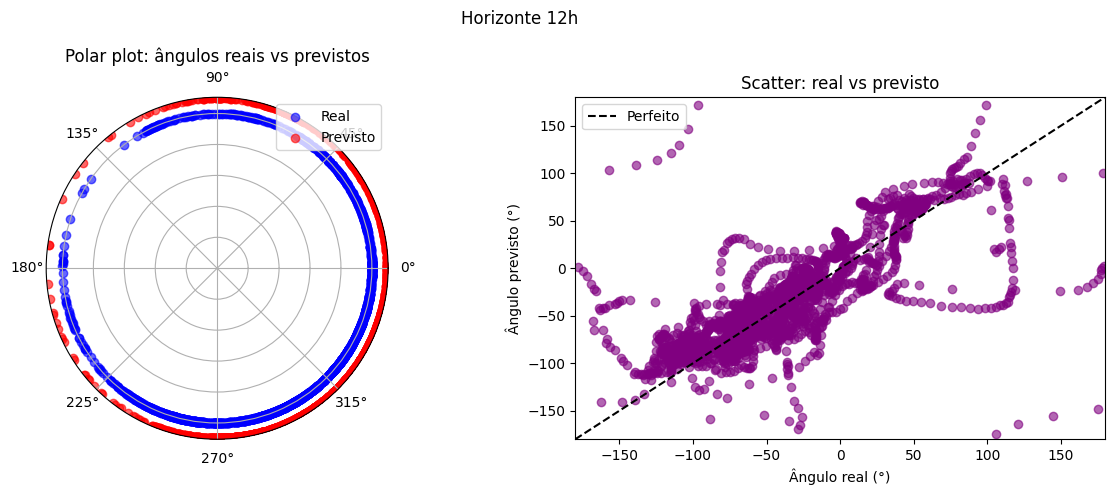


===== Horizonte 24h =====

Epoch 1/20
139/139 - 1s - 11ms/step - loss: 0.1288 - val_loss: 0.1941
Epoch 2/20
139/139 - 1s - 4ms/step - loss: 0.0629 - val_loss: 0.2190
Epoch 3/20
139/139 - 0s - 3ms/step - loss: 0.0480 - val_loss: 0.2234
Epoch 4/20
139/139 - 1s - 5ms/step - loss: 0.0374 - val_loss: 0.2033
Epoch 5/20
139/139 - 1s - 4ms/step - loss: 0.0303 - val_loss: 0.2252
Epoch 6/20
139/139 - 1s - 4ms/step - loss: 0.0247 - val_loss: 0.2388
Epoch 7/20
139/139 - 0s - 3ms/step - loss: 0.0212 - val_loss: 0.2545
Epoch 8/20
139/139 - 1s - 4ms/step - loss: 0.0181 - val_loss: 0.2719
Epoch 9/20
139/139 - 1s - 4ms/step - loss: 0.0163 - val_loss: 0.2670
Epoch 10/20
139/139 - 1s - 4ms/step - loss: 0.0145 - val_loss: 0.2593
Epoch 11/20
139/139 - 1s - 5ms/step - loss: 0.0132 - val_loss: 0.2420
Epoch 12/20
139/139 - 1s - 4ms/step - loss: 0.0119 - val_loss: 0.2472
Epoch 13/20
139/139 - 1s - 5ms/step - loss: 0.0093 - val_loss: 0.2563
Epoch 14/20
139/139 - 1s - 5ms/step - loss: 0.0088 - val_loss: 0.2758


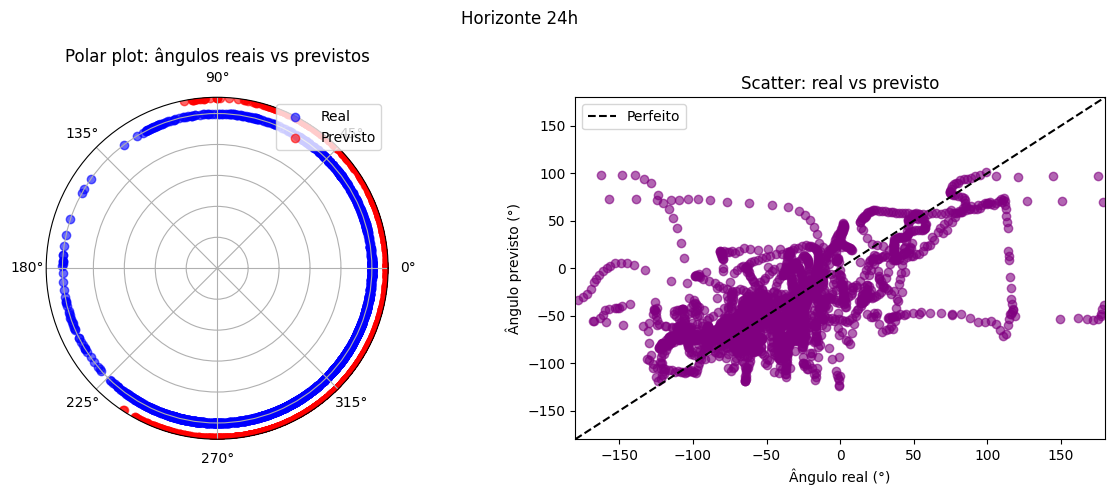

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

HORIZONS = [1, 3, 6, 12, 24]
LOOKBACK = 24

TARGETS = ['mwd_era5_sin','mwd_era5_cos']  # prever ambos juntos
FEATURES_ERA5 = [
    'u10_era5',
    'v10_era5',
    'swh_era5',
    'mwd_era5_sin',
    'mwd_era5_cos',
    'mwp_era5',
    'pp1d_era5'
]

results = []

def angular_error_deg(true, pred):
    """Diferença angular mínima em graus"""
    delta = np.arctan2(np.sin(np.deg2rad(pred - true)),
                       np.cos(np.deg2rad(pred - true)))
    return np.rad2deg(delta)

def plot_angle_predictions(y_true_angle, y_pred_angle, title="Predição de ângulos"):
    """Polar plot e scatter plot de ângulos"""
    fig = plt.figure(figsize=(12,5))

    # Polar plot
    ax1 = fig.add_subplot(1,2,1, polar=True)
    ax1.scatter(np.deg2rad(y_true_angle), np.ones_like(y_true_angle),
                label="Real", alpha=0.6, color="blue")
    ax1.scatter(np.deg2rad(y_pred_angle), np.ones_like(y_pred_angle)*1.1,
                label="Previsto", alpha=0.6, color="red")
    ax1.set_yticklabels([])
    ax1.set_title("Polar plot: ângulos reais vs previstos")
    ax1.legend(loc='upper right')

    # Scatter real vs previsto
    ax2 = fig.add_subplot(1,2,2)
    ax2.scatter(y_true_angle, y_pred_angle, alpha=0.6, color="purple")
    ax2.plot([-180,180], [-180,180], 'k--', label="Perfeito")
    ax2.set_xlim(-180,180)
    ax2.set_ylim(-180,180)
    ax2.set_xlabel("Ângulo real (°)")
    ax2.set_ylabel("Ângulo previsto (°)")
    ax2.set_title("Scatter: real vs previsto")
    ax2.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def create_supervised_dataset(df, features, target, lookback, horizon):
    """
    df: DataFrame com features + targets
    features: lista de colunas de input
    target: lista de colunas target
    lookback: número de timesteps anteriores
    horizon: quantos passos à frente prever
    """
    X, y = [], []
    
    data = df[features + target].values  # target já pode ser lista
    n_features = len(features)
    n_targets = len(target)

    for i in range(lookback, len(df) - horizon):
        # X = todos os features nos últimos 'lookback' timesteps
        X.append(data[i - lookback:i, :n_features])
        # y = todos os targets no passo 'horizon' à frente
        y.append(data[i + horizon, n_features:n_features + n_targets])

    X = np.array(X)
    y = np.array(y)
    
    return X, y
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='linear'))  # sin e cos
    model.compile(optimizer='adam', loss='mse')
    return model

# ===== Loop de treino =====
for h in HORIZONS:

    print(f'\n===== Horizonte {h}h =====\n')

    # criar dataset com os dois targets
    X, y = create_supervised_dataset(
        df,
        FEATURES_ERA5,
        target=TARGETS,  # sin e cos juntos
        lookback=LOOKBACK,
        horizon=h
    )

    X_train, X_test, y_train, y_test = temporal_train_test_split(X, y)
    X_train, X_test, scaler = scale_data(X_train, X_test)

    model = build_cnn_model(X_train.shape[1:])
    
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=20,
        batch_size=32,
        verbose=2
    )

    # Previsões
    y_pred = model.predict(X_test)

    # Reconstruir ângulo
    y_test_angle = np.rad2deg(np.arctan2(y_test[:,0], y_test[:,1]))
    y_pred_angle = np.rad2deg(np.arctan2(y_pred[:,0], y_pred[:,1]))

    # Erro angular mínimo
    angle_error = angular_error_deg(y_test_angle, y_pred_angle)

    # Métricas
    rmse_sin_cos = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_sin_cos  = mean_absolute_error(y_test, y_pred)
    r2_sin_cos   = r2_score(y_test, y_pred)

    mae_angle = np.mean(np.abs(angle_error))
    rmse_angle = np.sqrt(np.mean(angle_error**2))

    print(f'MSE/MAE/R2 (sin+cos): RMSE={rmse_sin_cos:.3f}, MAE={mae_sin_cos:.3f}, R2={r2_sin_cos:.3f}')
    print(f'Erro angular: MAE={mae_angle:.2f}°, RMSE={rmse_angle:.2f}°')

    # Guardar resultados
    results.append({
        "horizon": h,
        "rmse_sin_cos": rmse_sin_cos,
        "mae_sin_cos": mae_sin_cos,
        "r2_sin_cos": r2_sin_cos,
        "mae_angle": mae_angle,
        "rmse_angle": rmse_angle,
        "y_test": y_test,
        "y_pred": y_pred,
        "y_test_angle": y_test_angle,
        "y_pred_angle": y_pred_angle
    })

    # Plot polar + scatter
    plot_angle_predictions(y_test_angle, y_pred_angle, title=f'Horizonte {h}h')



In [26]:
import pandas as pd

# Extrair apenas os valores importantes para a tabela
df_results = pd.DataFrame([
    {
        'Horizon (h)': r['horizon'],
    
        'RMSE (°)': r['rmse_angle'],
        'MAE (°)': r['mae_angle']
    }
    for r in results
])

print(df_results)


   Horizon (h)   RMSE (°)    MAE (°)
0            1  10.375899   5.818520
1            3  18.995032  10.611980
2            6  28.446618  15.044545
3           12  33.065822  21.856622
4           24  43.968166  31.742944
